In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from non_param_effect_size import calc_non_param_ci, cles_ind, rbc_ind

%matplotlib inline

In [3]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [4]:
study = pd.read_csv("../data/study_playlist_tracks.csv")
study.drop(columns="Unnamed: 0", inplace=True)
study.head()

,id,artist,title,album,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7doJTm33FOrVlGJVybeM5T,Nick Leng,Music to Clean the House to,Music to Clean the House to,34,0.320,0.485,1,-8.125,0,0.0306,0.0614,0.540000,0.1810,0.155,79.769,225733,4
1,0OibLGqxfI7dBjoEDLqWD5,Camp Kona,Homesick,Homesick,37,0.752,0.234,9,-13.013,1,0.1560,0.6340,0.000000,0.1010,0.744,127.852,229102,4
2,1FuQy32K6DPowR1cBhVbS7,SADBOii,Nothing,Nothing,51,0.510,0.666,7,-7.008,1,0.0861,0.4740,0.000000,0.0775,0.213,179.960,208500,4
3,5aZ1ZCYA1vdDWj7HeJoiWt,FINLAY,bones,bones,41,0.673,0.641,6,-7.564,0,0.0398,0.6360,0.000063,0.1470,0.359,145.993,213809,4
4,4hisNuwSsci6D1V9QxuiwE,Pool Toys,Bad Things,Bad Things,20,0.533,0.810,6,-8.274,0,0.0485,0.2030,0.005130,0.3680,0.568,160.023,229537,4


<IPython.core.display.Javascript object>

In [5]:
gen = pd.read_csv("../data/sampled_set.csv")
gen.drop(columns="Unnamed: 0", inplace=True)
gen.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,['Ignacio Corsini'],0.601,111333,0.1980,0,4rTjeJa5upBPcTPWtXYcJz,0.000082,6,0.3850,-19.337,0,Cuando Llora el Corazón - Remasterizado,0,1929-06-20,0.0777,122.350,0.842,1929
1,0.805,['Carole King'],0.650,186200,0.3420,0,7oEIm5uvKfOeMwilOAYb32,0.000006,4,0.0913,-11.345,1,Beautifull,41,1968,0.0289,77.093,0.558,1968
2,0.973,"['Arthur Sullivan', 'Muriel Harding', 'Neville...",0.353,242307,0.0836,0,0cc1sgKtjZtMEzH1qE9tS0,0.000001,6,0.3130,-19.784,1,The Sorcerer / Act 1: 15. Sprites of earth and...,0,1953-01-01,0.0499,89.151,0.149,1953
3,0.322,['Bill LaBounty'],0.648,265640,0.4020,0,3KH39R9cO3ZWN6hqRbTKM3,0.000001,3,0.0886,-14.972,1,This Night Won't Last Forever,30,1978-07-21,0.0241,102.682,0.607,1978
4,0.309,['The Allman Brothers Band'],0.488,259444,0.7210,0,7K4jh3V3fP00WKg7c6lwqA,0.048200,2,0.4370,-9.141,1,"Statesboro Blues - Live At Fillmore East, Marc...",23,1971-07-01,0.0617,125.940,0.786,1971


<IPython.core.display.Javascript object>

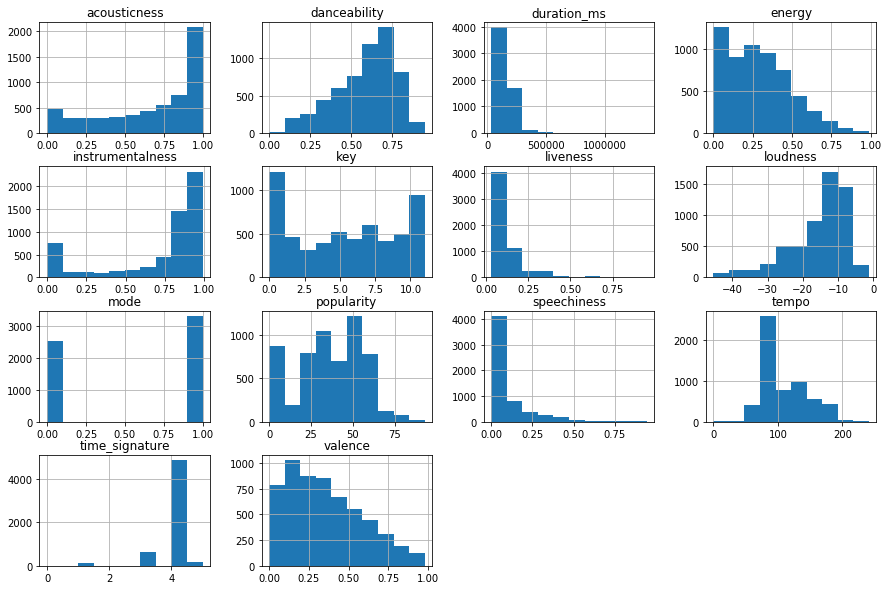

<IPython.core.display.Javascript object>

In [6]:
study.hist(figsize=(15, 10))
plt.show()

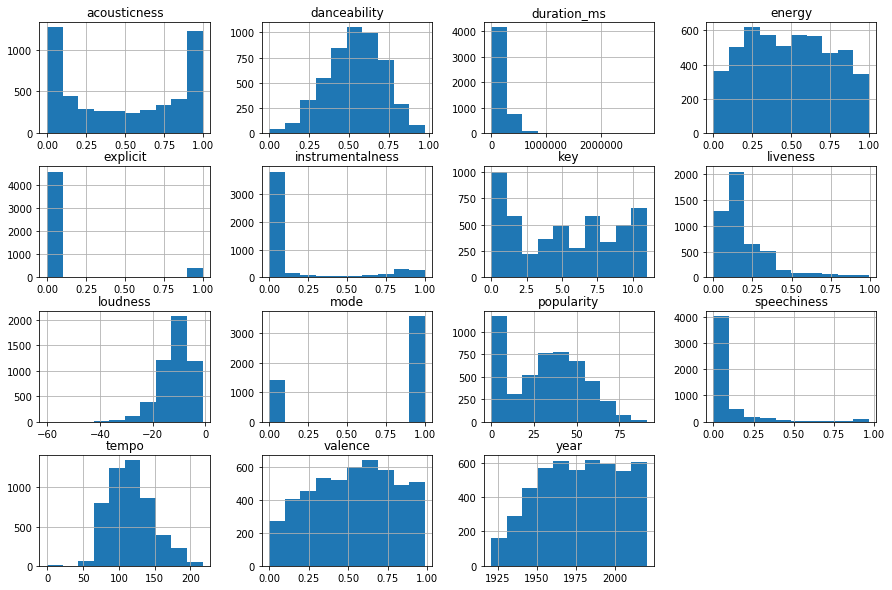

<IPython.core.display.Javascript object>

In [7]:
gen.hist(figsize=(15, 10))
plt.show()

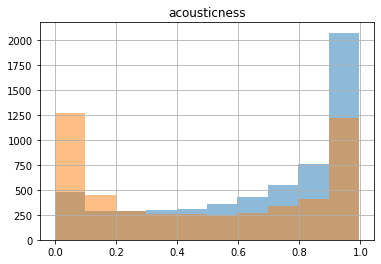

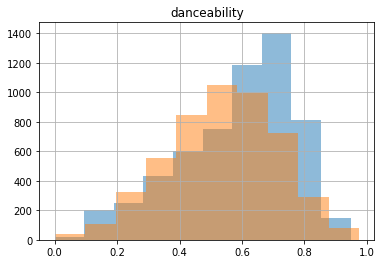

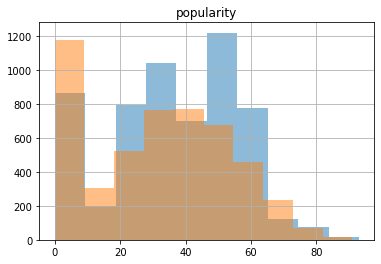

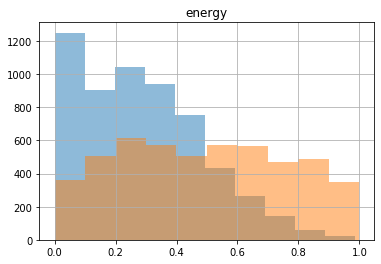

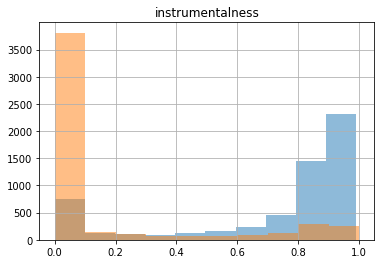

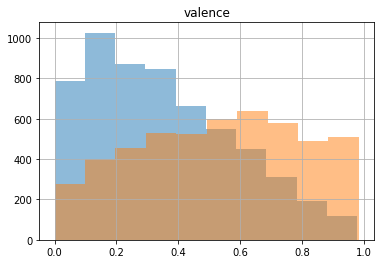

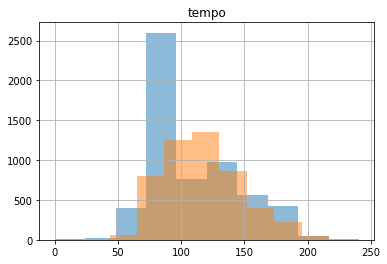

<IPython.core.display.Javascript object>

In [11]:
columns_of_interest = [
    "acousticness",
    "danceability",
    "popularity",
    "energy",
    "instrumentalness",
    "valence",
    "tempo",
]
for c in columns_of_interest:
    study[c].hist(alpha=0.5)
    gen[c].hist(alpha=0.5)
    plt.title(c)
    plt.show()